Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Tang Han"
COLLABORATORS = ""

---

# Lab 6: Multiple Linear Regression and Feature Engineering

In this lab, we will work through the process of:
1. Implementing a linear model 
1. Defining loss functions
1. Feature engineering
1. Minimizing loss functions using numeric libraries and analytical methods 

This lab will continue using the toy tip calculation dataset used in Lab 5.

**This assignment should be completed and submitted by Monday October 1, 2018 at 11:59pm**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** at the top of this notebook.

In [203]:
def dist(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [207]:
def cnt_dist_gt_1(point):
    return np.sum(df.apply(lambda row: dist(row, point), axis=1) > 1)

np.sum(df.apply(lambda row: dist(row, (0.236374, 0.155692)), axis=1) > 1)

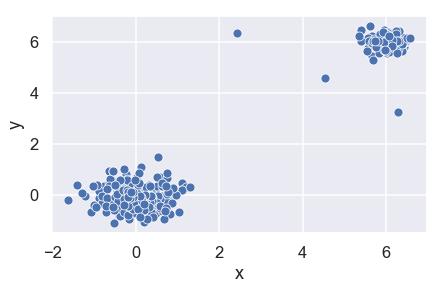

In [216]:
sns.scatterplot(x='x', y='y', data=df)

In [223]:
df.apply(cnt_dist_gt_1, axis=1)

0      180
1      159
2      251
3      196
4      144
5      195
6      253
7      152
8      169
9      154
10     159
11     144
12     181
13     181
14     145
15     213
16     260
17     239
18     164
19     135
20     176
21     184
22     156
23     165
24     194
25     181
26     162
27     221
28     162
29     152
      ... 
273    203
274    204
275    203
276    203
277    203
278    227
279    203
280    203
281    203
282    219
283    204
284    204
285    210
286    203
287    206
288    211
289    204
290    224
291    203
292    203
293    204
294    203
295    203
296    203
297    205
298    204
299    204
300    302
301    302
302    302
Length: 303, dtype: int64

In [213]:
np.random.seed(123)
x1 = np.random.normal(0, 0.5, 200)
y1 = np.random.normal(0, 0.5, 200)
df1 = pd.DataFrame({'x': x1, 'y':y1})

x2 = np.random.normal(6, 0.25, 100)
y2 = np.random.normal(6, 0.25, 100)
df2 = pd.DataFrame({'x': x2, 'y':y2})

x3 = np.random.normal(4, 2, 3)
y3 = np.random.normal(4, 2, 3)
df3 = pd.DataFrame({'x':x3, 'y':y3})

df = pd.concat([df1, df2, df3], ignore_index=True)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Loading the Tips Dataset

To begin, let's load the tips dataset from the `seaborn` library.  This dataset contains records of tips, total bill, and information about the person who paid the bill. This is the same dataset used in Lab 5, so it should look familiar!

In [2]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Question 1: Defining the Model and Feature Engineering

In the previous lab, we defined a simple linear model with only one parameter. Now let's make a more complicated model that utilizes other features in our dataset. Let our prediction for tip be a combination of the following features:

$$
\text{Tip} = \theta_1 \cdot \text{total_bill} + \theta_2 \cdot \text{sex} + \theta_3 \cdot \text{smoker} + \theta_4 \cdot \text{day} + \theta_5 \cdot \text{time} + \theta_6 \cdot \text{size}
$$

Notice that some of these features are not numbers! But our linear model will need to predict a numerical value. Let's start by converting some of these non-numerical values into numerical values. Below we split the tips and the features.

In [5]:
tips = data['tip']
X = data.drop(columns='tip')

## Question 1a: Feature Engineering

First, let's convert our features to numerical values. A straightforward approach is to map some of these non-numerical features into numerical ones. 

For example, we can treat the day as a value from 1-7. However, one of the disadvantages in directly translating to a numeric value is that we unintentionally assign certain features disproportionate weight. Consider assigning Sunday to the numeric value of 7, and Monday to the numeric value of 1. In our linear model, Sunday will have 7 times the influence of Monday, which can lower the accuracy of our model.

Instead, let's use one-hot encoding to better represent these features! 

As discussed in lecture, one-hot encoding will produce a binary vector indicating the non-numeric feature. Sunday would be encoded as a [0 0 0 0 0 0 1]. This assigns a more even weight across each category in non-numeric features. Complete the code below to one-hot encode our dataset.

In [15]:
def one_hot_encode(data):
    """
    Return the one-hot encoded dataframe of our input, data.
    
    Parameters
    -----------
    data: a dataframe that may include non-numerical features
    
    Returns
    -----------
    A one-hot encoded dataframe that only contains numeric features
    
    Hint: Check out the pd.get_dummies function
    """
    # YOUR CODE HERE
    return pd.get_dummies(data)
#     raise NotImplementedError()

Run the cell below to see the transformed dataset named `one_hot_X`. This dataframe holds our "featurized" data, which is also often denoted by $\phi$.

In [17]:
one_hot_X = one_hot_encode(X)
one_hot_X.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


In [23]:
assert one_hot_X.shape == (244, 12)
# Makes sure all columns are numeric
assert np.all([np.issubdtype(one_hot_X[column].dtype, np.number) for column in one_hot_X])

## Question 1b: Defining the Model

Now that all of our data is numeric, we can begin to define our model function. Notice that after one-hot encoding our data, we now have 12 features instead of 6. Therefore, our linear model now looks like:

$$
\text{Tip} = \theta_1 \cdot \text{size} + \theta_2 \cdot \text{total_bill} + \theta_3 \cdot \text{day_Thur} + \theta_4 \cdot \text{day_Fri} + ... + \theta_{11} \cdot \text{time_Lunch} + \theta_{12} \cdot \text{time_Dinner}
$$

We can represent the linear combination above as a matrix-vector product. Implement the `linear_model` function to evaluate this product.

**Hint**: You can use [np.dot](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html), [pd.DataFrame.dot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dot.html), or the `@` operator to multiply matrices/vectors. However, while the `@` operator can be used to multiply `numpy` arrays, it generally will not work between two `pandas` objects, so keep that in mind when computing matrix-vector products!

In [31]:
def linear_model(thetas, X):
    """
    Return the linear combination of thetas and features as defined above.
    
    Parameters
    -----------
    thetas: a 1D vector representing the parameters of our model ([theta1, theta2, ...])
    X: a 2D dataframe of numeric features
    
    Returns
    -----------
    A 1D vector representing the linear combination of thetas and features as defined above.
    """
    # YOUR CODE HERE
#     return np.dot(X, thetas)
    return X @ thetas

#     raise NotImplementedError()

In [46]:
assert linear_model(np.arange(1,5), np.arange(1,5)) == 30
assert (linear_model(2*np.eye(100), np.ones(100)) == 2*np.ones(100)).all()
test_theta = np.array([[1, 2], [3, 4], [5, 6]])
test_x = np.array([[1, 3, 5], [2, 4, 6]])
expected = np.array([[35, 44], [44, 56]])
actual = linear_model(test_theta, test_x)
assert np.array_equal(actual, expected)

# Question 2: Fitting the Model using Numeric Methods

Recall in the previous lab we defined multiple loss functions and found optimal theta using the scipy.minimize function. Adapt the loss functions and optimization code from the previous lab (provided below) to work with our new linear model.

In [58]:
from scipy.optimize import minimize

def l1(y, y_hat):
    return np.abs(y - y_hat)

def l2(y, y_hat):
    return (y - y_hat)**2

def minimize_average_loss(loss_function, model, X, y):
    """
    Minimize the average loss calculated from using different theta vectors, and 
    estimate the optimal theta for the model.
    
    Parameters
    -----------
    loss_function: either the squared or absolute loss functions defined above
    model: the model (as defined in Question 1b)
    X: a 2D dataframe of numeric features (one-hot encoded)
    y: a 1D vector of tip amounts
    
    Returns
    -----------
    The estimate for the optimal theta vector that minimizes our loss
    """
    
    ## Notes on the following function call which you need to finish:
    # 
    # 0. The first '...' should be replaced with the average loss evaluated on 
    #       the data X, y using the model and appropriate loss function.
    # 1. x0 are the initial values for THETA.  Yes, this is confusing
    #       but optimization people like x to be the thing they are 
    #       optimizing. Replace the second '...' with an initial value for theta,
    #       and remember that theta is now a vector. DO NOT hard-code the length of x0;
    #       it should depend on the number of features in X.
    # 2. Your answer will be very similar to your answer to question 2 from lab 5.
    # YOUR CODE HERE
#     raise NotImplementedError()
    return minimize(lambda theta: np.mean(loss_function(model(theta, X), y)), x0=np.zeros(X.shape[1]))['x'] # We extract 'x' 
    # Notice above that we extract the 'x' entry in the dictionary returned by `minimize`. 
    # This entry corresponds to the optimal theta estimated by the function.

minimize_average_loss(l2, linear_model, one_hot_X, tips)

array([ 0.094487  ,  0.1759912 ,  0.18411085,  0.21655235,  0.15712761,
        0.24353555,  0.01519972,  0.17746092,  0.05600946,  0.15199343,
        0.23440129,  0.1662616 ])

In [59]:
expected_l1 = np.array([0.1021857, 0.08590592, 0.1181548, 0.28102618, 0.13510419, 0.2640767, 
                        -0.0567563, 0.20579663, -0.03585098, 0.28599161, 0.17696859, 0.22221226])
expected_l2 = np.array([0.094487, 0.1759912, 0.18411085, 0.21655235, 0.15712761, 0.24353555, 
                        0.01519972, 0.17746092, 0.05600946, 0.15199343, 0.23440129, 0.1662616])
actual_l1 = np.array(minimize_average_loss(l1, linear_model, one_hot_X, tips))
actual_l2 = np.array(minimize_average_loss(l2, linear_model, one_hot_X, tips))

# Check if your values for theta predict similar tips as our values for theta do
assert np.isclose(one_hot_X @ expected_l1, one_hot_X @ actual_l1, rtol=0.1).all()
assert np.isclose(one_hot_X @ expected_l2, one_hot_X @ actual_l2, rtol=0.001).all()

# Question 3: Fitting the Model using Analytic Methods

Let's also fit our model analytically, for the l2 loss function. In this question we will derive an analytical solution, fit our model and compare our results with our numerical optimization results.

Recall that if we're fitting a linear model with the l2 loss function, we are performing least squares! Remember, we are solving the following optimization problem for least squares:

$$\min_{\theta} ||X\theta - y||^2$$

Let's begin by deriving the analytic solution to least squares. We begin by expanding out the l2 norm and multiplying out all of the terms.

<table style="width:75%">
  <tr>
    <th style="text-align: center">Math</th>
    <th style="text-align: center">Explanation</th> 
  </tr>
  <tr>
    <td>$$||X\theta - y||^2 = (X\theta - y)^T (X\theta - y)$$</td>
    <td>Expand l2 norm using the definition for matrices.</td> 
  </tr>
  <tr>
    <td>$$ = (\theta^T X^T - y^T) (X\theta - y)$$</td>
    <td>Distribute the transpose operator. Remember that $(AB)^T = B^TA^T$.</td> 
  </tr>
  <tr>
    <td>$$ = \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta + y^T y$$</td>
    <td>Multiply out all of the terms (FOIL).</td> 
  </tr>
  <tr>
    <td>$$ = \theta^T X^T X \theta - 2\theta^T X^T y + y^T y$$</td>
    <td>The two middle terms are both transposes of each other, and they are both scalars (since we have a 1xn row vector times an nxn matrix times an nx1 column vector). Since the transpose of a scalar is still the same scalar, we can combine the two middle terms.</td> 
  </tr>
</table>

Whew! Now that we have everything expanded out and somewhat simplified, let's take the gradient of the expression above and set it to the zero vector. This will allow us to solve for the optimal $\theta$ that will minimize our loss.

<table style="width:75%">
  <tr>
    <th style="text-align: center">Math</th>
    <th style="text-align: center">Explanation</th> 
  </tr>
  <tr>
    <td>$$\nabla_\theta (\theta^T X^T X \theta) - \nabla_\theta(2\theta^TX^T y) + \nabla_\theta(y^T y) = \vec{0}$$</td>
    <td>Let's take derivatives one term at a time.</td> 
  </tr>
  <tr>
    <td>$$(X^T X + (X^T X)^T)\theta - \nabla_\theta(2\theta^TX^T y) + \nabla_\theta(y^T y) = \vec{0}$$</td>
    <td>For the first term, we use the identity $\frac{\partial}{\partial x} x^T A x = (A + A^T)x$.</td> 
  </tr>
  <tr>
    <td>$$(X^T X + (X^T X)^T)\theta - 2X^T y + \nabla_\theta(y^T y) = \vec{0}$$</td>
    <td>For the second term, we use the identity $\frac{\partial}{\partial x} x^T A = A$.</td> 
  </tr>
  <tr>
    <td>$$(X^T X + (X^T X)^T)\theta - 2X^T y + \vec{0} = \vec{0}$$</td>
    <td>The last derivative is the easiest, since $y^T y$ does not depend on $\theta$.</td> 
  </tr>
  <tr>
    <td>$$2X^T X\theta = 2X^T y$$</td>
    <td>Notice that $(X^T X)^T = X^T X$, so we can combine the $X^T X$ terms into $2X^TX$. We also move $2X^Ty$ to the right side of the equation.</td> 
  </tr>
  <tr>
    <td>$$\theta = (X^T X)^{-1} X^T y$$</td>
    <td>Divide by 2 on both sides, then left-multiply by $(X^T X)^{-1}$ on both sides to solve for $\theta$.</td> 
  </tr>
</table>

## Question 3a: Solving for Theta

Now that we have the analytic solution for $\theta$, let's find the optimal numerical thetas for our tips dataset. Fill out the function below. 

Hints:
1. Use the `np.linalg.inv` function to compute matrix inverses
1. To compute the transpose of a matrix, you can use `X.T` or `X.transpose()`

In [153]:
from numpy.linalg import inv
from numpy.linalg import solve
# My problem: one_hot_X is singular, but np.linalg.inv returns an inverse for it. Why?
print("Shape of one_hot_X: ", one_hot_X.shape)
print("Rank of one_hot_X matrix: ", np.linalg.matrix_rank(one_hot_X.T @ one_hot_X))
np.linalg.inv(one_hot_X.T @ one_hot_X)  # should be an error!

Shape of one_hot_X:  (244, 12)
Rank of one_hot_X matrix:  9


array([[  8.78766928e-05,  -4.96664072e-04,   7.20715496e-03,
          7.27856033e-03,  -1.19564024e-03,  -9.74838360e-04,
         -2.62297367e-02,  -3.11155291e-02,  -3.98950614e-02,
         -2.83775633e-02,   1.37803576e-02,   2.70152938e-02],
       [ -4.96664072e-04,   7.64046745e-03,  -4.67908166e-02,
         -5.13406050e-02,   5.65279737e-03,   4.21693237e-03,
          1.99407234e-01,   2.06189108e-01,   1.60720185e-01,
          2.00222363e-01,  -1.34633563e-01,  -1.78474125e-01],
       [ -1.55846983e-02,   9.85312033e-02,   2.09966326e+13,
          2.14759606e+13,  -1.54625045e+13,  -1.55692786e+13,
          3.33176574e+14,   2.91388911e+14,   3.12921846e+14,
          2.91388911e+14,  -3.13005910e+14,  -3.35177950e+14],
       [ -1.54609847e-02,   9.83059984e-02,   2.09966326e+13,
          2.14759606e+13,  -1.54625045e+13,  -1.55692786e+13,
          3.33176574e+14,   2.91388911e+14,   3.12921846e+14,
          2.91388911e+14,  -3.13005910e+14,  -3.35177950e+14],
    

In [123]:
def get_analytical_sol(X, y):
    """
    Computes the analytical solution to our least squares problem
    
    Parameters
    -----------
    X: a 2D dataframe of numeric features (one-hot encoded)
    y: a 1D vector of tip amounts
    
    Returns
    -----------
    The estimate for theta computed using the equation mentioned above
    """
    # YOUR CODE HERE
    return solve(X.T @ X, X.T @ y)
#     return inv(X.T @ X) @ X.T @ y  # doen not work
#     return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)  # larger loss
#     raise NotImplementedError()

In [124]:
analytical_thetas = get_analytical_sol(one_hot_X, tips)
print("Our analytical loss is: ", l2(linear_model(analytical_thetas, one_hot_X),tips).mean())
print("Our numerical loss is: ", l2(linear_model(minimize_average_loss(l2, linear_model, one_hot_X, tips), one_hot_X), tips).mean())

Our analytical loss is:  1.01035356123
Our numerical loss is:  1.01035356124


In [125]:
analytical_thetas

array([  9.44870060e-02,   1.75992003e-01,  -3.02121859e+01,
        -3.01797449e+01,  -1.53165239e+01,  -1.52301155e+01,
        -7.45501699e+01,  -7.43879107e+01,  -7.45093691e+01,
        -7.44133913e+01,   1.20669717e+02,   1.20601588e+02])

In [78]:
assert np.isclose(l2(linear_model(analytical_thetas, one_hot_X),tips).mean(), 328.61824697, rtol=1)

## Question 3b: Weird Results?
Our analytical loss is surprisingly much worse than our numerical loss. Why is this? 

Hint: https://stackoverflow.com/questions/31256252/why-does-numpy-linalg-solve-offer-more-precise-matrix-inversions-than-numpy-li

To get better performance, `np.linalg.inv` does not calculate the inverse matrix of A directly. Instead it calls the "gesv LAPACK routines". So the result is not accurate.

## Submission

You're done!

Before submitting this assignment, ensure to:

1. Restart the Kernel (in the menubar, select Kernel->Restart & Run All)
2. Validate the notebook by clicking the "Validate" button

Finally, make sure to **submit** the assignment via the Assignments tab in Datahub